# Acnat2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums, mannwhitneyu

In [2]:
gene = 'Acnat2'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv', delimiter=',')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30514213,C57BL/6N,m,mutant,het (Acnat2),23.8,78.47,45.49,2.81,1.59
1,30514214,C57BL/6N,m,control,wt (Acnat2),29.4,85.84,53.84,3.06,1.40
2,30514215,C57BL/6N,m,mutant,het (Acnat2),28.7,63.80,34.05,3.74,2.48
3,30514216,C57BL/6N,m,control,wt (Acnat2),28.1,91.82,62.17,2.63,0.94
4,30514222,C57BL/6N,m,mutant,het (Acnat2),24.6,90.19,59.23,2.61,1.08
5,30514223,C57BL/6N,m,mutant,het (Acnat2),27.7,85.12,53.04,2.52,1.24
6,30514224,C57BL/6N,m,control,wt (Acnat2),27.5,93.47,64.96,2.44,0.84
7,30514225,C57BL/6N,m,mutant,het (Acnat2),29.9,91.02,61.24,3.11,1.26
8,30514237,C57BL/6N,f,control,wt (Acnat2),21.8,90.22,59.19,2.44,1.01
9,30514238,C57BL/6N,f,mutant,het (Acnat2),22.4,92.16,62.28,2.40,0.94


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30514245,Acnat2_1vX.dcm,2.724419,0.057500,0.846221,0.015000,750.000000,0.057500,0.999722,high,0.999722,high,27.623261,1.306686,95.269617,68.939394,C57BL/6N,m,mutant,het (Acnat2),25.1,92.55,63.40,2.67,1.00,0.054419,2.697209,-0.153779,0.923110,2.719617,5.539394
1,30514245,Acnat2_1vX.dcm,2.641860,0.137500,0.990698,0.100000,692.307692,0.137500,0.999722,high,0.999722,high,25.599816,2.007393,92.158565,62.500000,C57BL/6N,m,mutant,het (Acnat2),25.1,92.55,63.40,2.67,1.00,-0.028140,2.655930,-0.009302,0.995349,-0.391435,-0.900000
2,30514245,Acnat2_1vX.dcm,2.621221,0.224167,0.846221,0.178333,765.957447,0.224167,0.999945,high,0.999722,high,25.107276,1.306686,94.795588,67.716535,C57BL/6N,m,mutant,het (Acnat2),25.1,92.55,63.40,2.67,1.00,-0.048779,2.645610,-0.153779,0.923110,2.245588,4.316535
3,30514245,Acnat2_1vX.dcm,2.683140,0.302500,1.114535,0.261667,720.000000,0.302500,0.999945,high,0.999945,high,26.600867,2.757472,89.633900,58.461538,C57BL/6N,m,mutant,het (Acnat2),25.1,92.55,63.40,2.67,1.00,0.013140,2.676570,0.114535,1.057267,-2.916100,-4.938462
4,30514245,Acnat2_1vX.dcm,2.600581,0.385833,0.970058,0.344167,692.307692,0.385833,0.999945,high,0.999945,high,24.620048,1.896068,92.298682,62.698413,C57BL/6N,m,mutant,het (Acnat2),25.1,92.55,63.40,2.67,1.00,-0.069419,2.635291,-0.029942,0.985029,-0.251318,-0.701587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,30514591,Gstm1_1vX_65.dcm,2.435465,4.433333,0.660465,4.299167,791.208791,4.433333,0.999733,high,0.999733,high,20.912479,0.658962,96.848954,72.881356,C57BL/6N,m,control,wt (Gstm1),24.1,90.74,59.92,2.35,1.04,0.085465,2.392733,-0.379535,0.850233,6.108954,12.961356
4106,30514591,Gstm1_1vX_65.dcm,2.373547,4.509167,0.949419,4.382500,660.550459,4.509167,0.999666,high,0.999733,high,19.608760,1.788553,90.878806,60.000000,C57BL/6N,m,control,wt (Gstm1),24.1,90.74,59.92,2.35,1.04,0.023547,2.361773,-0.090581,0.994709,0.138806,0.080000
4107,30514591,Gstm1_1vX_65.dcm,2.249709,4.600000,0.908140,4.465000,685.714286,4.600000,0.999666,high,0.999666,high,17.141604,1.584791,90.754710,59.633028,C57BL/6N,m,control,wt (Gstm1),24.1,90.74,59.92,2.35,1.04,-0.100291,2.299855,-0.131860,0.974070,0.014710,-0.286972
4108,30514591,Gstm1_1vX_65.dcm,2.394186,4.687500,0.804942,4.549167,827.586207,4.687500,0.997699,high,0.999666,high,20.038114,1.139125,94.315208,66.379310,C57BL/6N,m,control,wt (Gstm1),24.1,90.74,59.92,2.35,1.04,0.044186,2.372093,-0.235058,0.922471,3.575208,6.459310


In [5]:
filtered_data[['LVIDd_auto', 'LVIDs_auto', 'EF_auto', 'FS_auto', 'genotype', 'sex']].groupby(by=['sex','genotype']).agg(['mean', 'std']).round(2)#.to_latex()

LVIDd_auto       LVIDs_auto       EF_auto       FS_auto       
                   mean   std       mean   std    mean   std    mean    std
sex genotype                                                               
f   control        2.56  0.29       0.96  0.32   91.34  9.03   62.93   9.12
    mutant         2.58  0.23       1.02  0.24   89.98  7.09   60.36   8.66
m   control        2.56  0.23       1.04  0.26   88.68  9.64   58.97  10.23
    mutant         2.72  0.24       1.12  0.23   88.77  7.52   58.52   8.22

In [6]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Differences between automatic and manual measurements

In [7]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

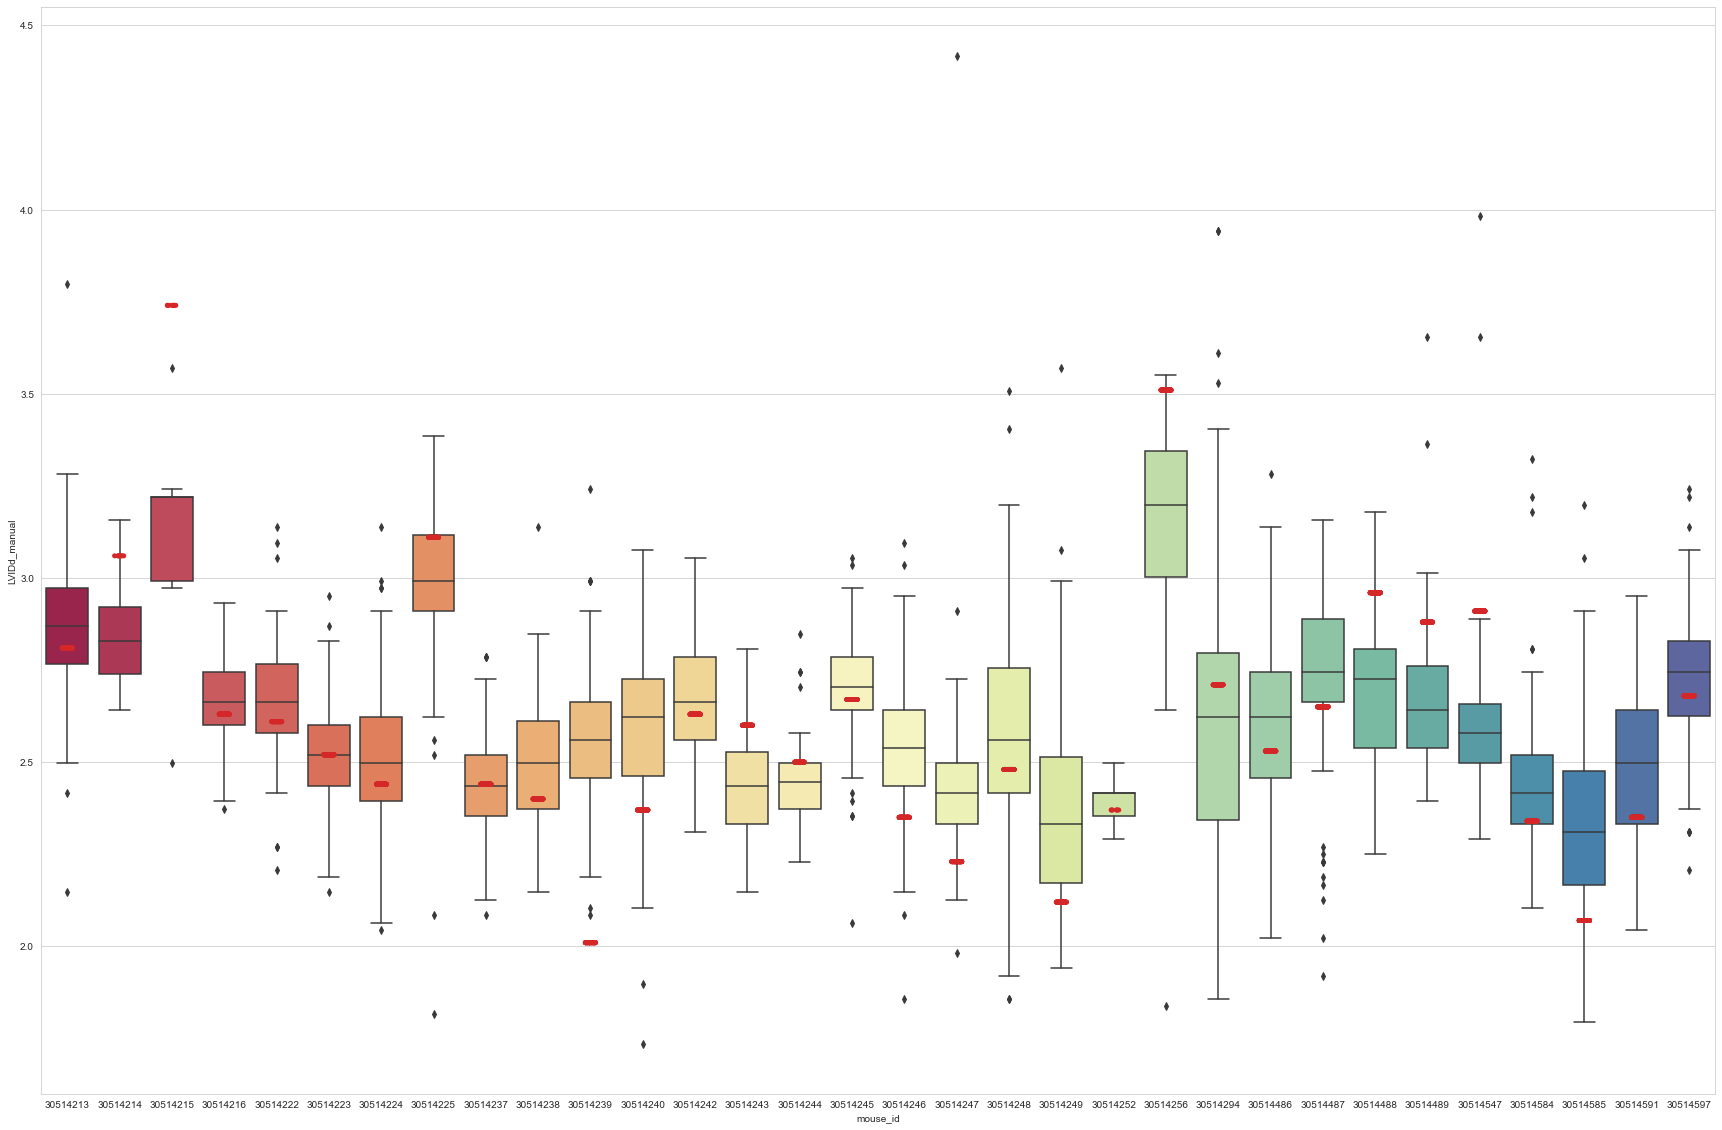

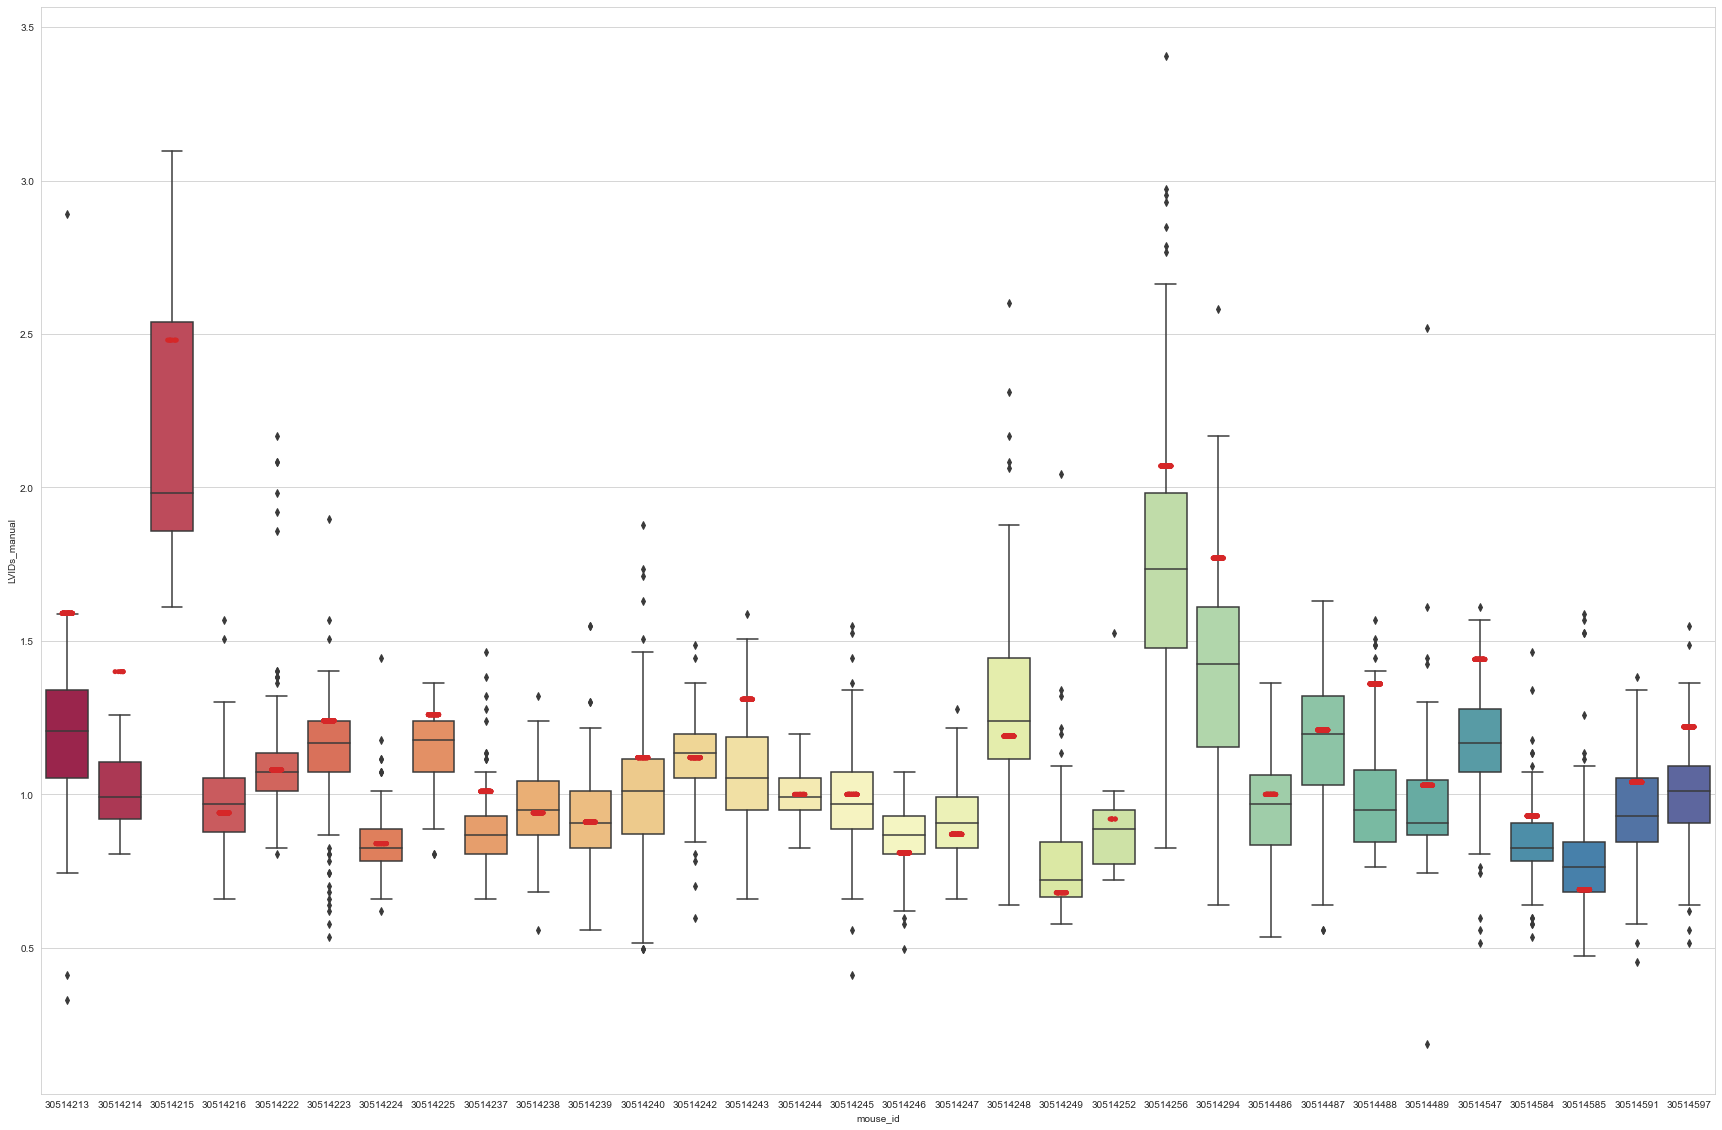

In [8]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

/var/folders/n_/jbljd4tj5n597j4x17mmm_240000gp/T/ipykernel_79547/1900006949.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize= (10,10))


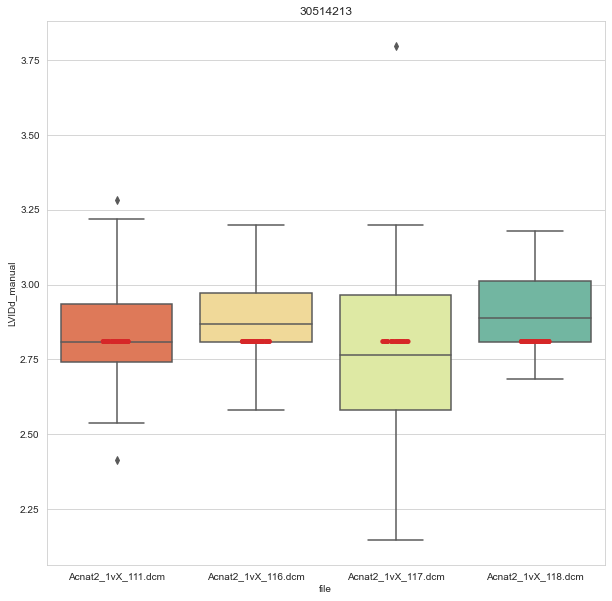

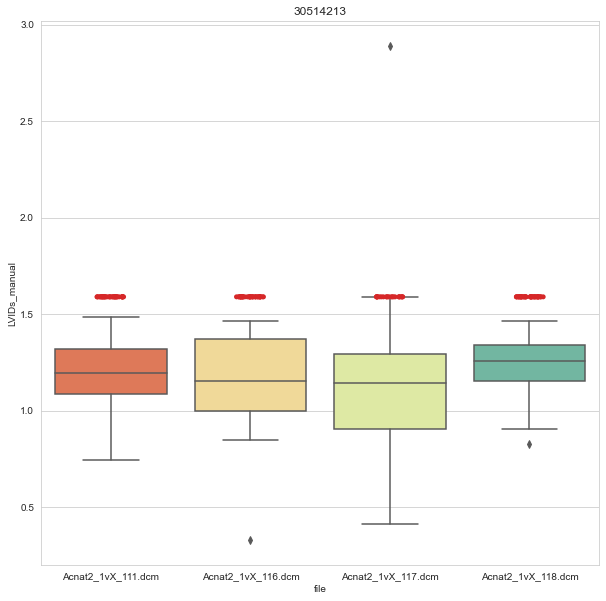

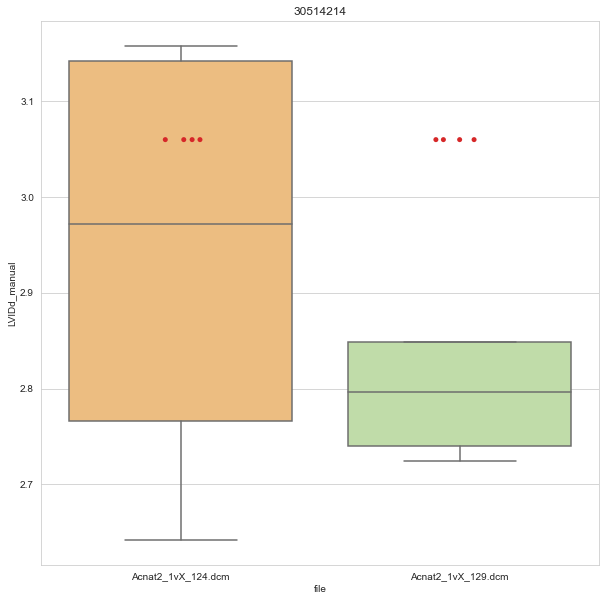

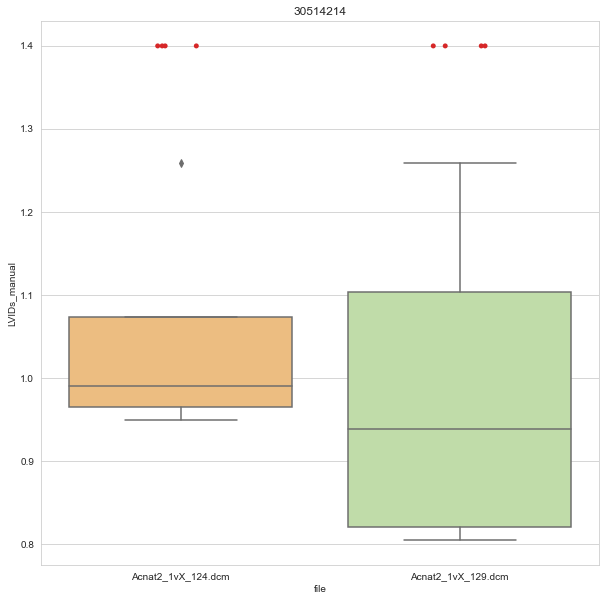

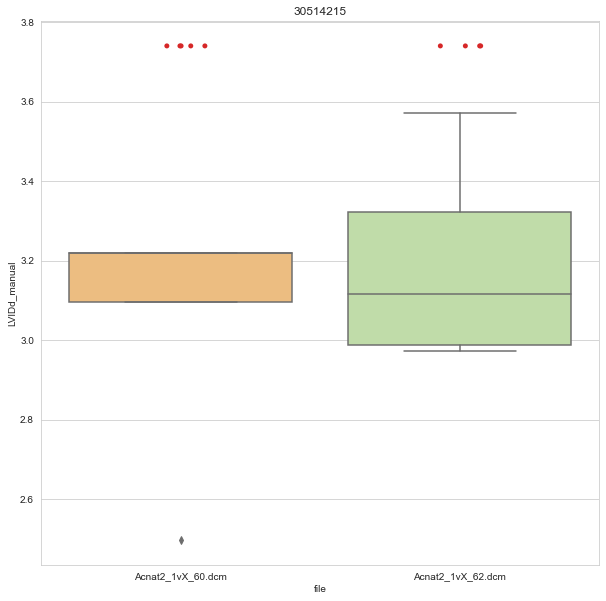

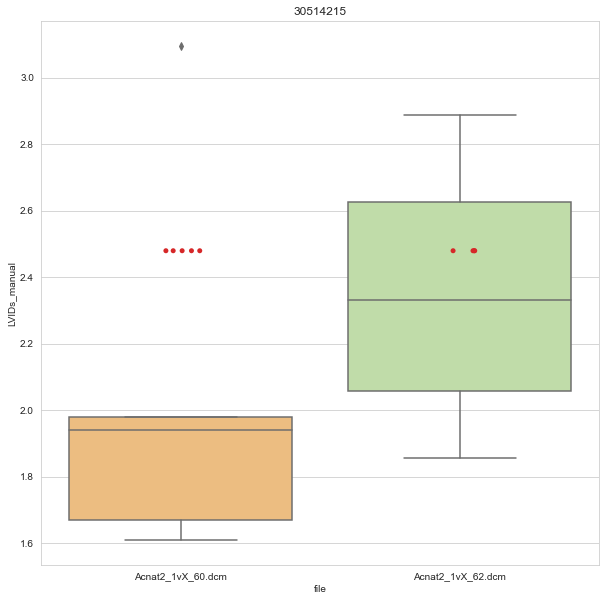

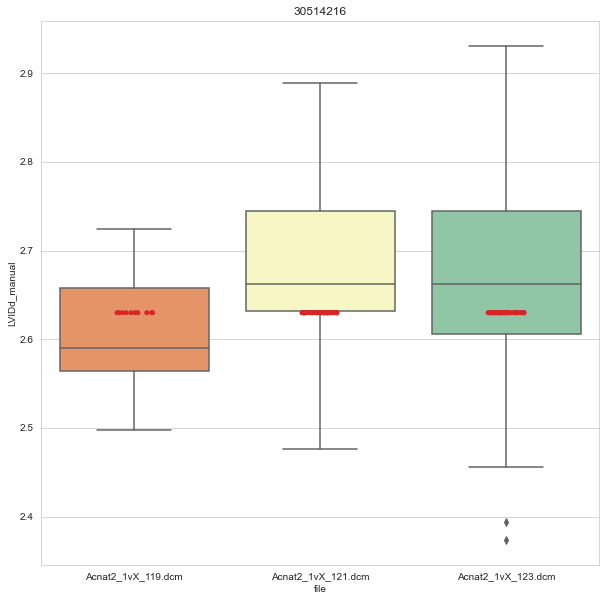

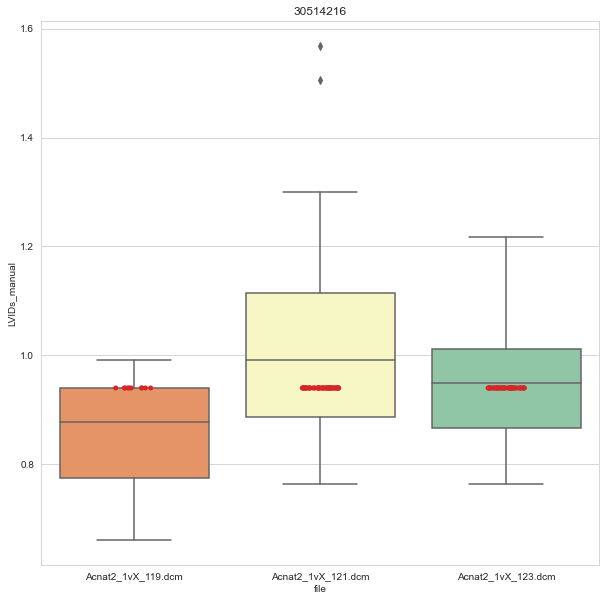

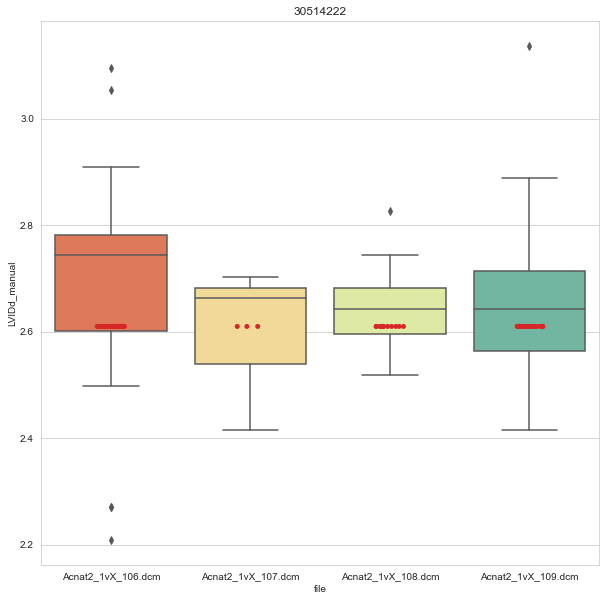

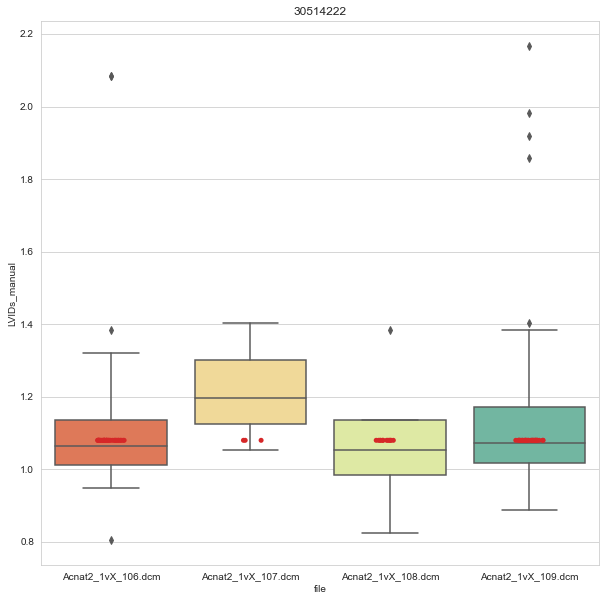

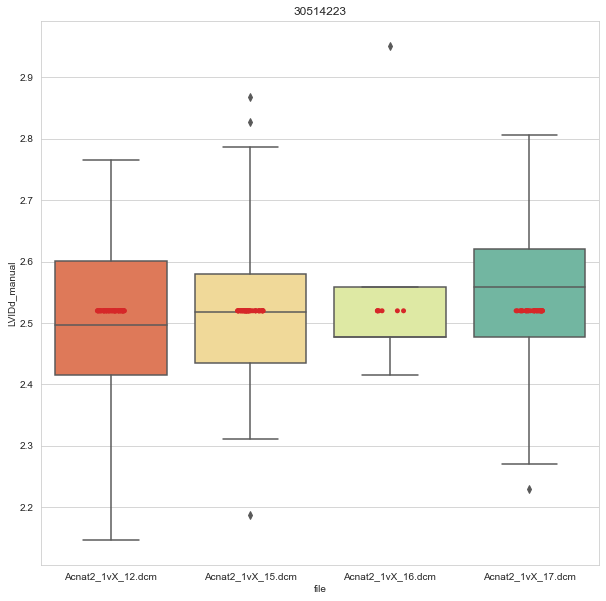

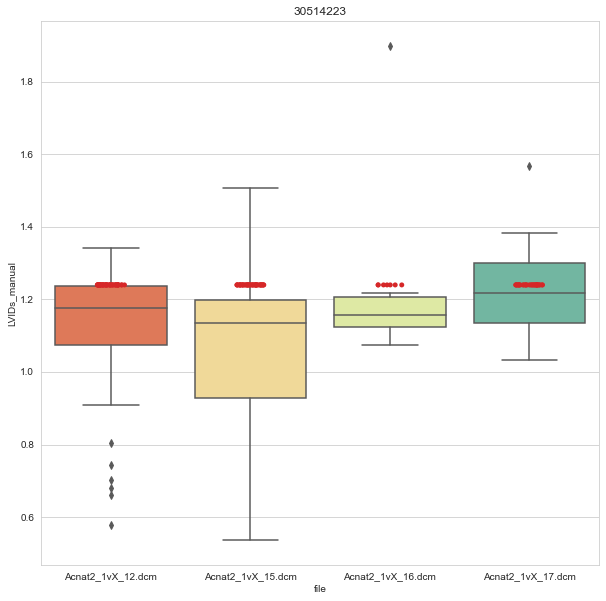

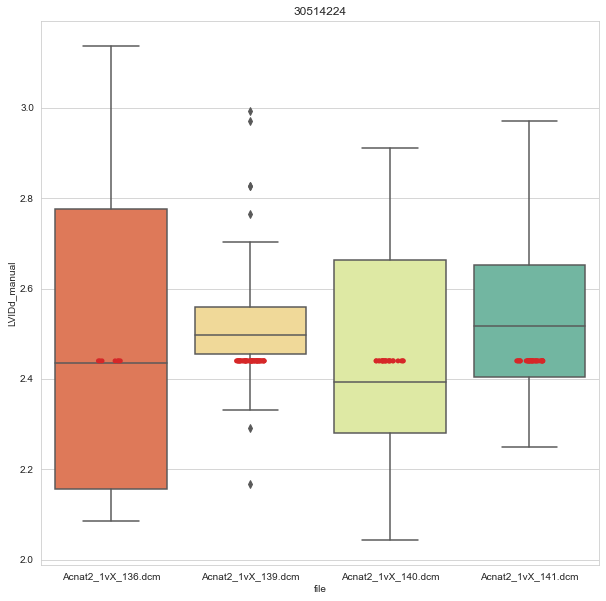

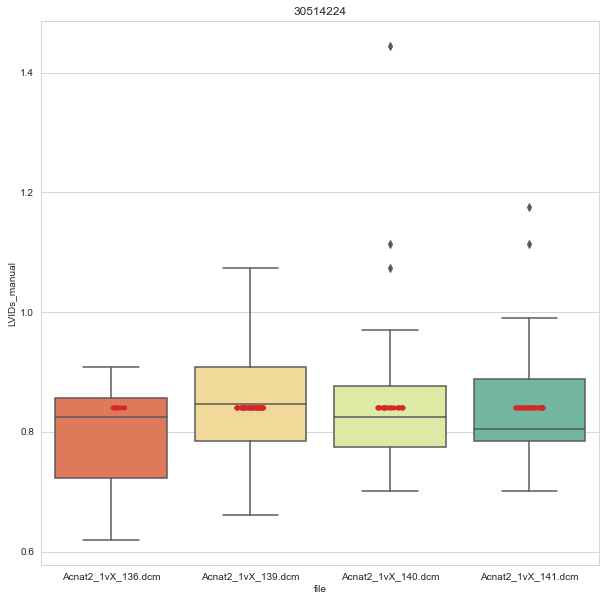

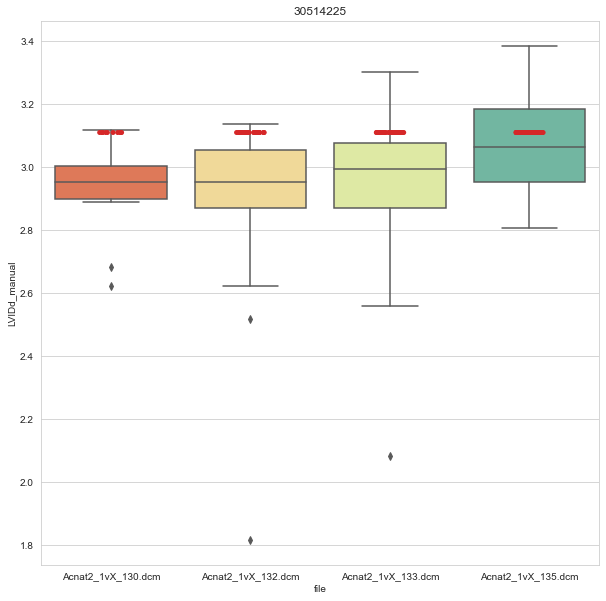

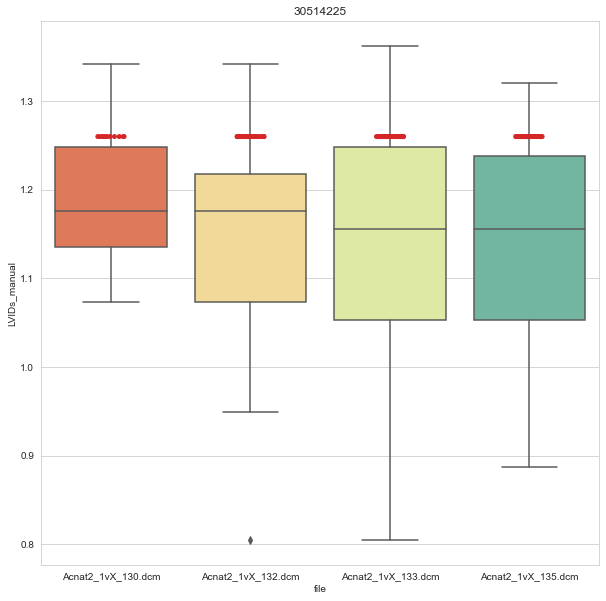

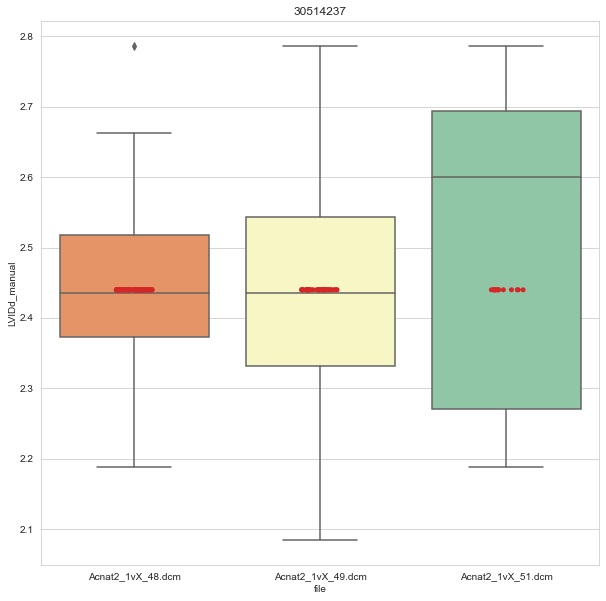

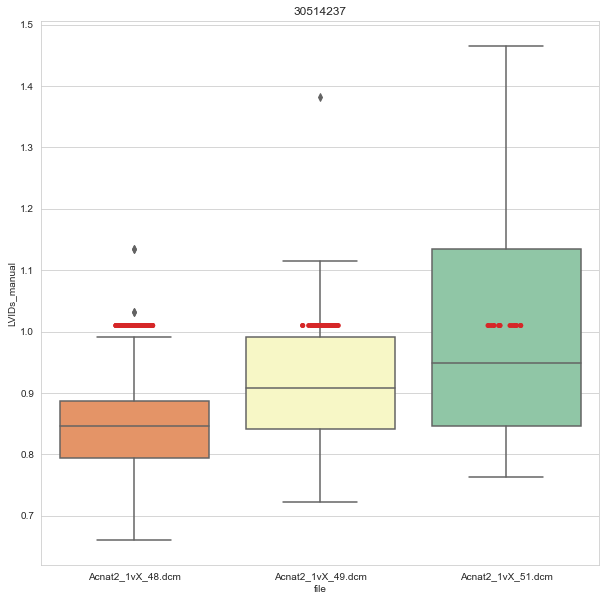

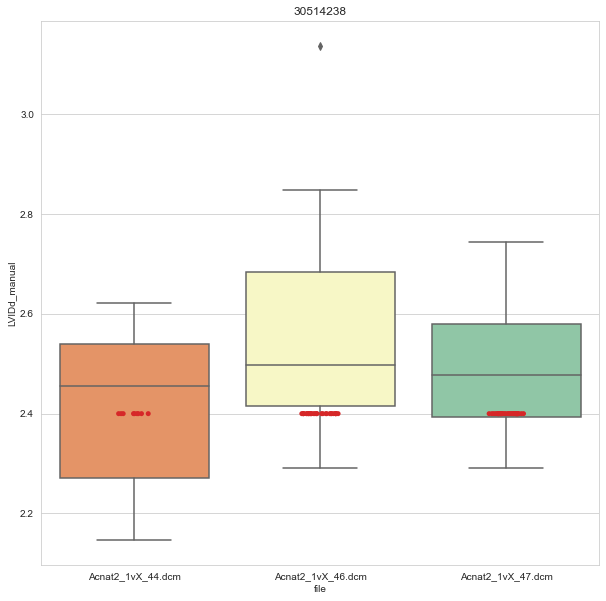

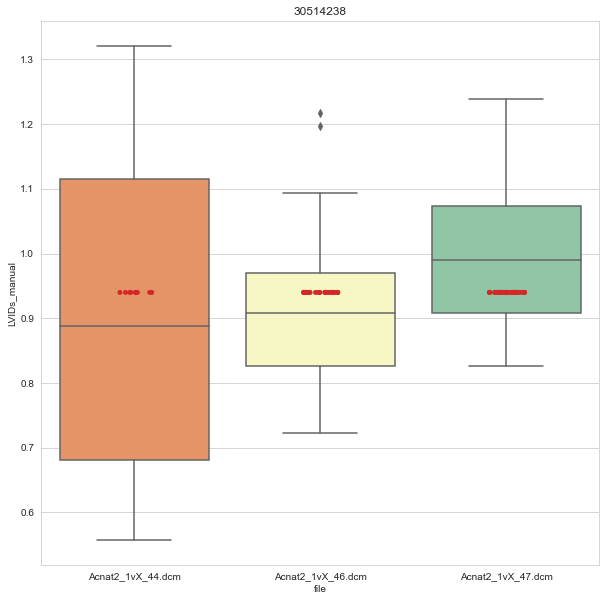

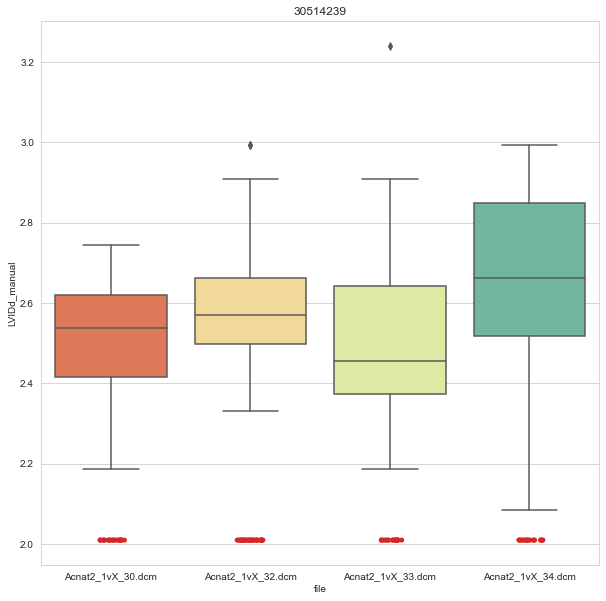

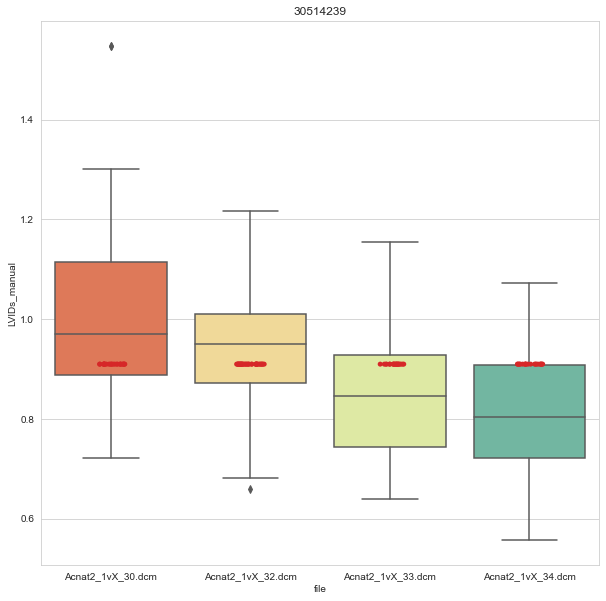

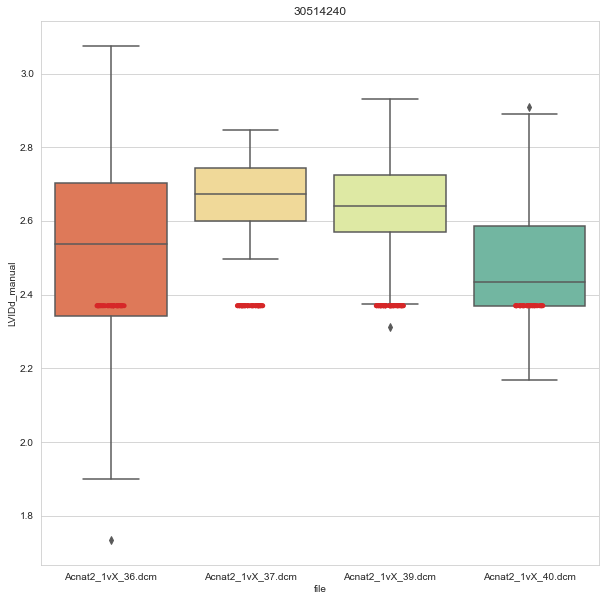

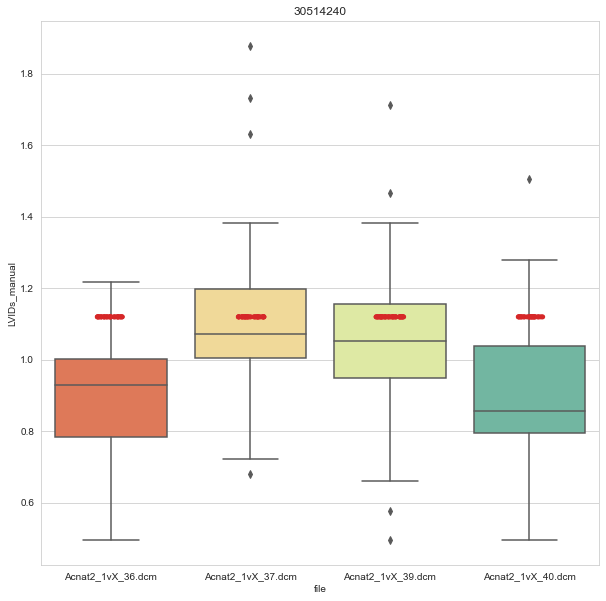

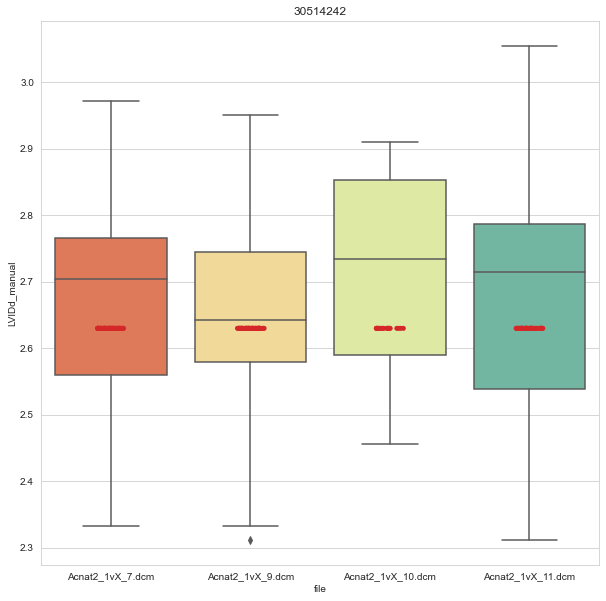

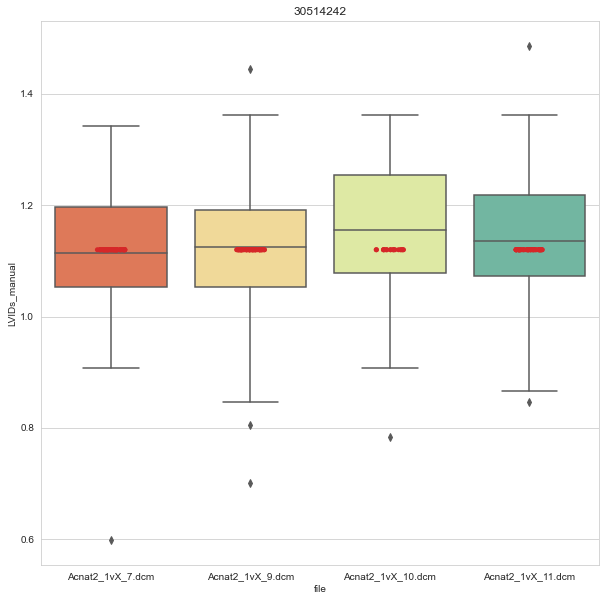

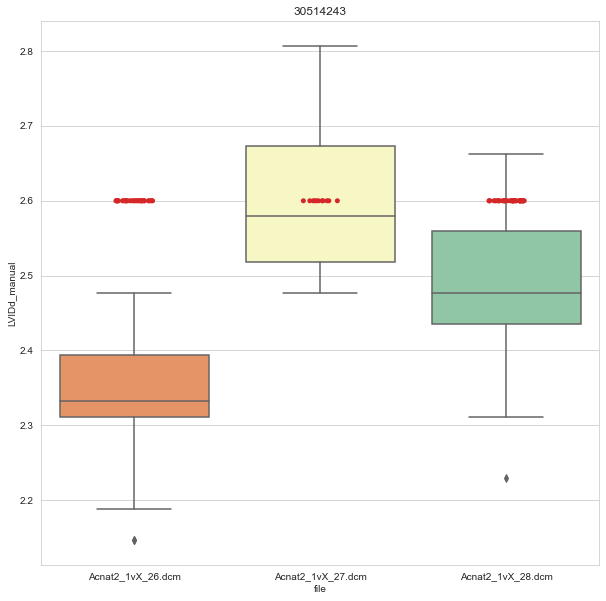

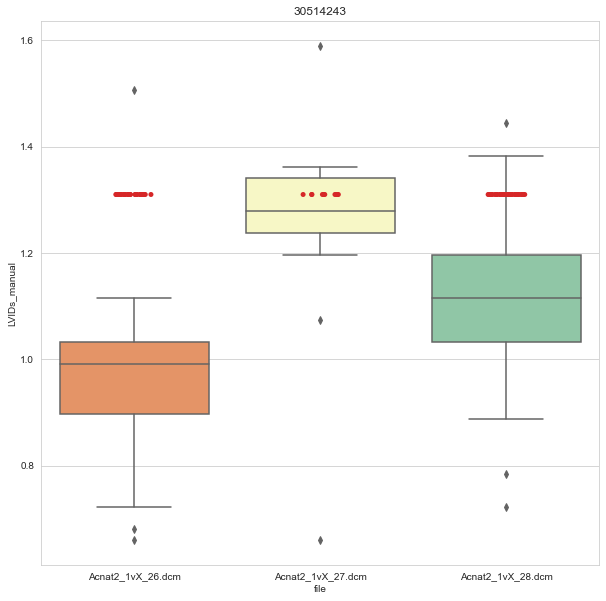

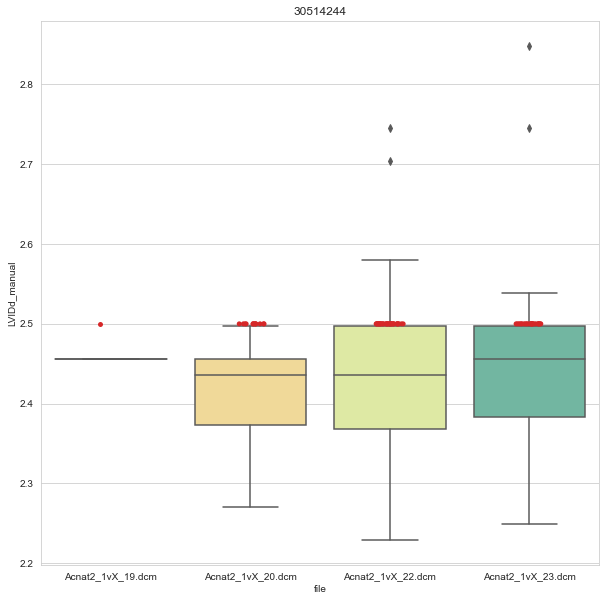

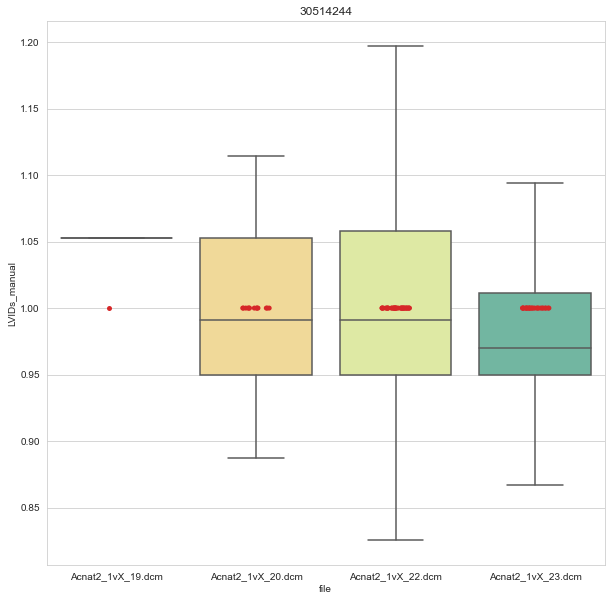

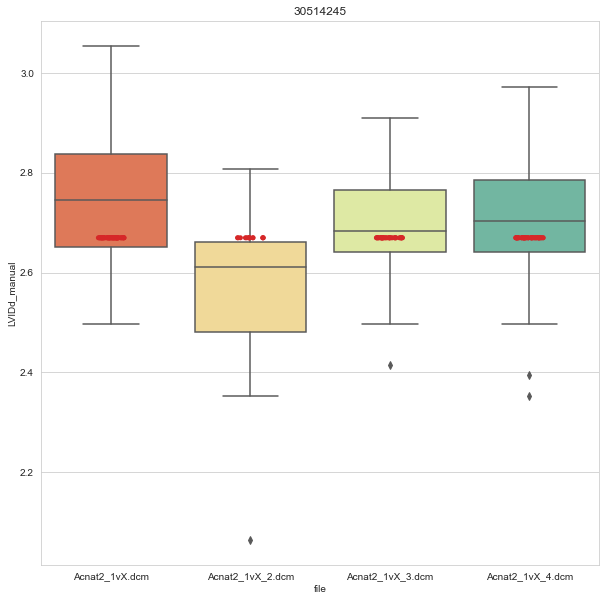

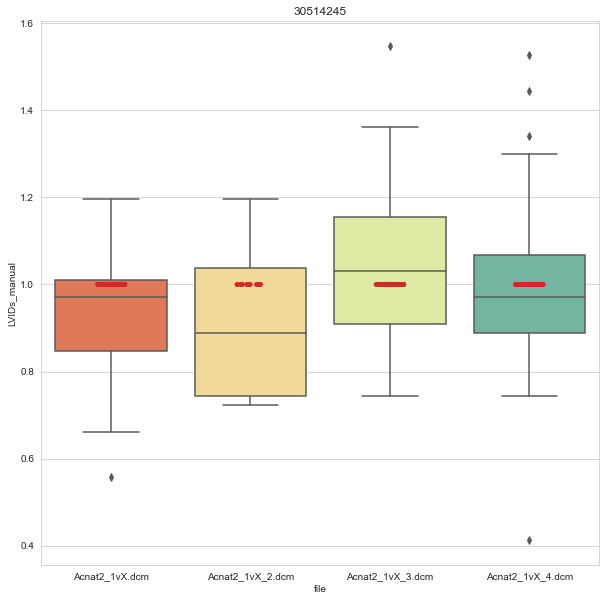

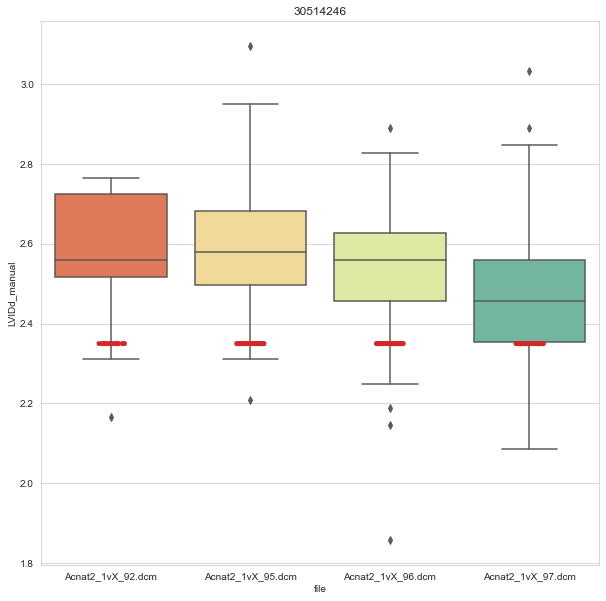

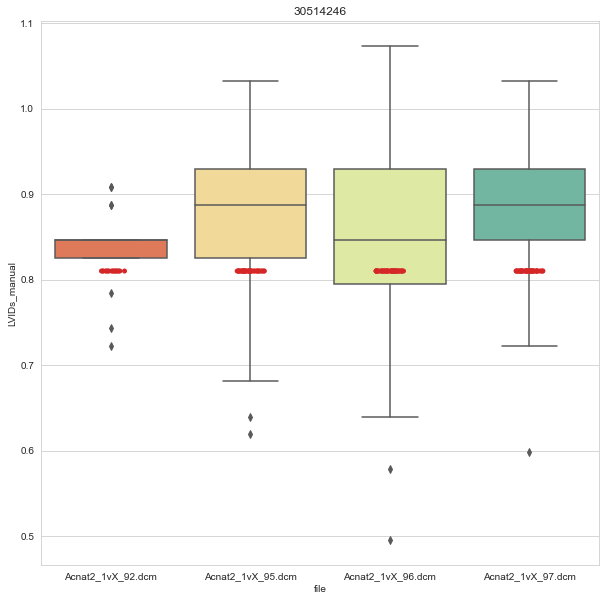

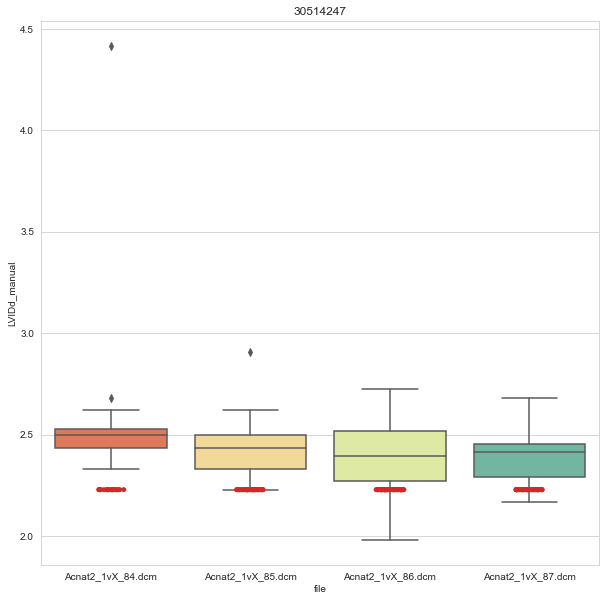

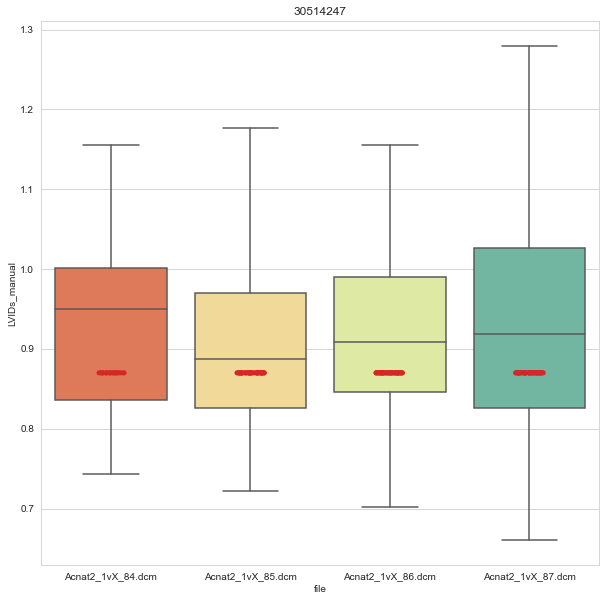

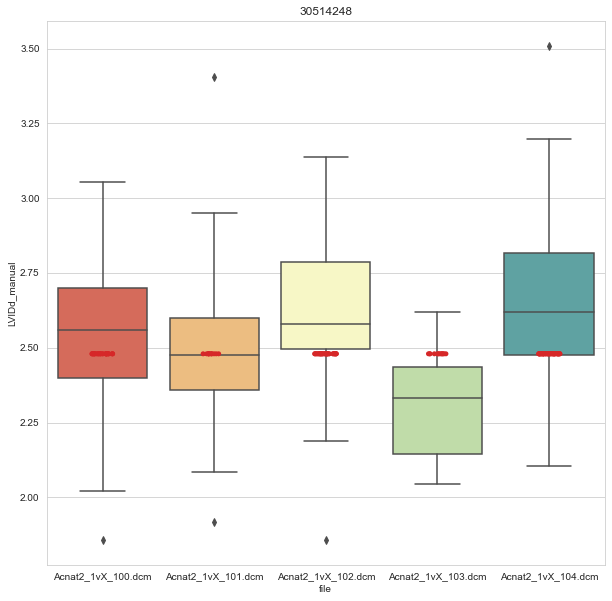

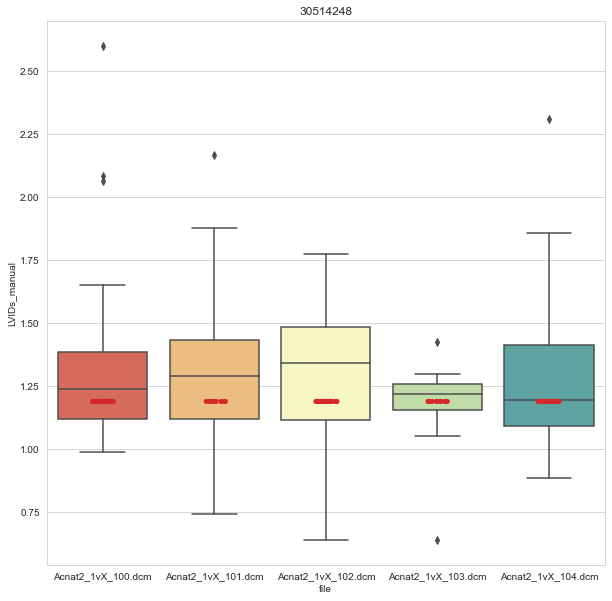

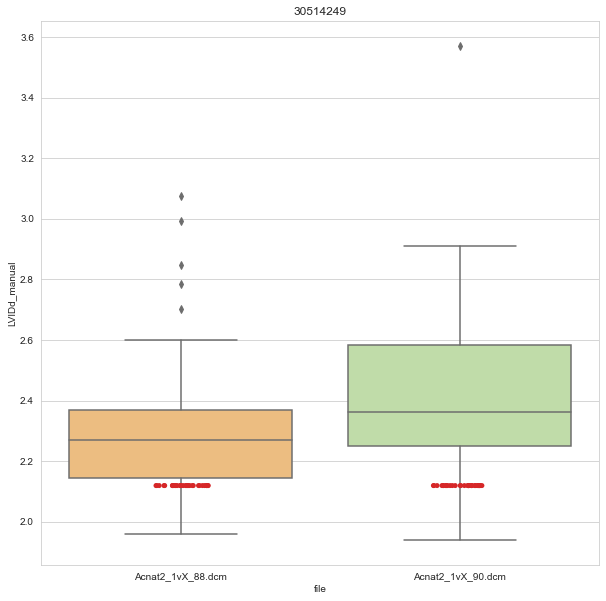

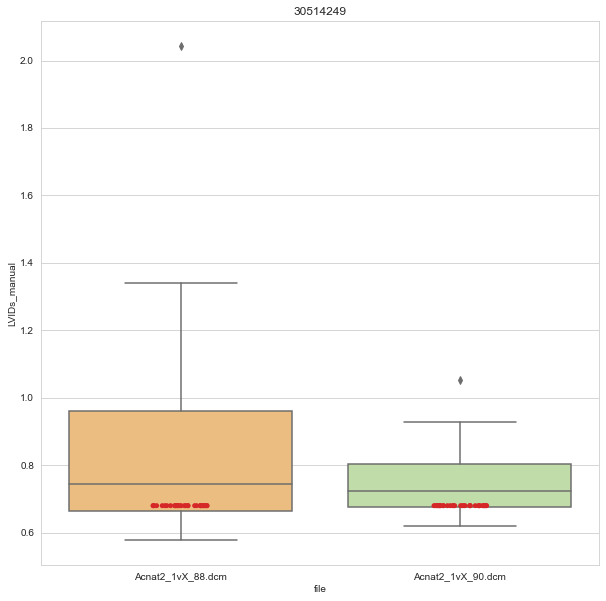

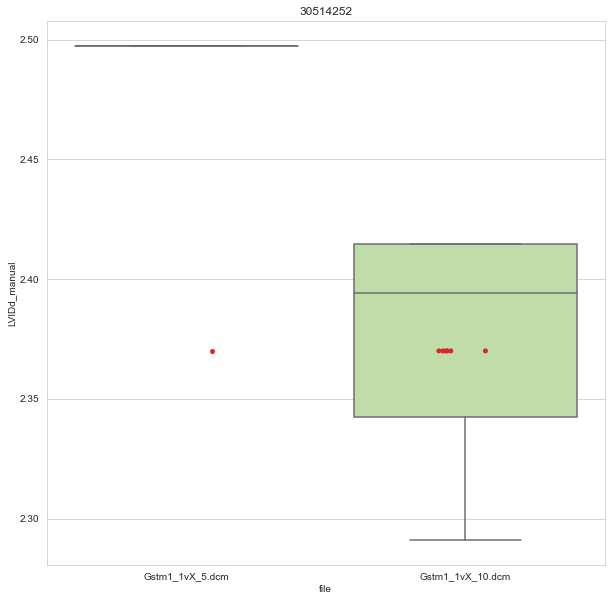

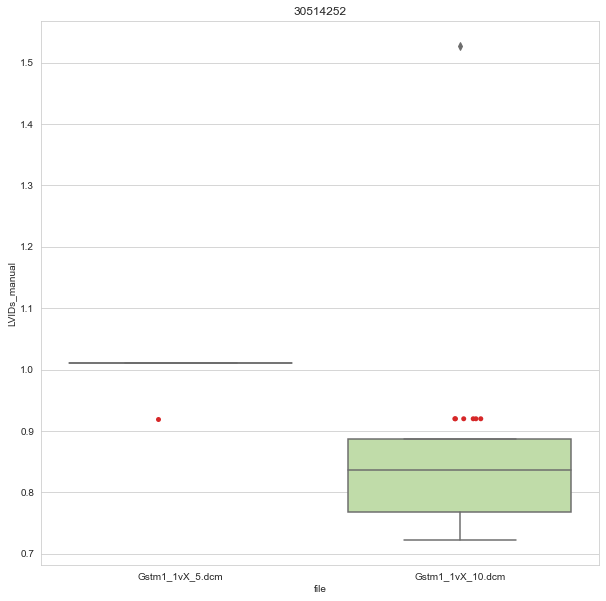

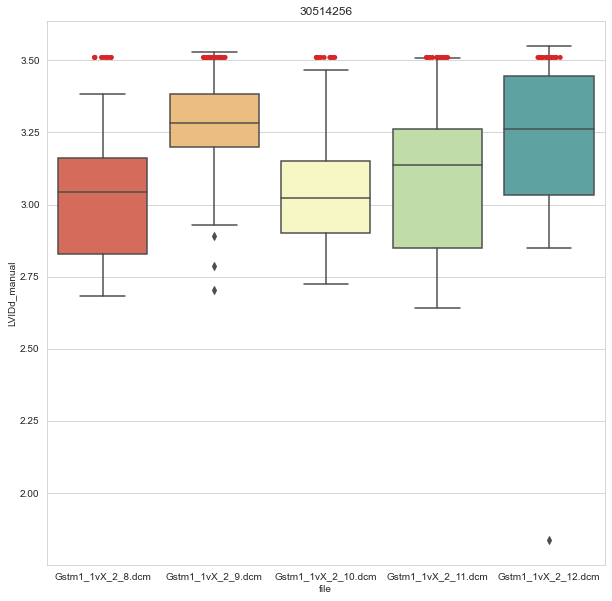

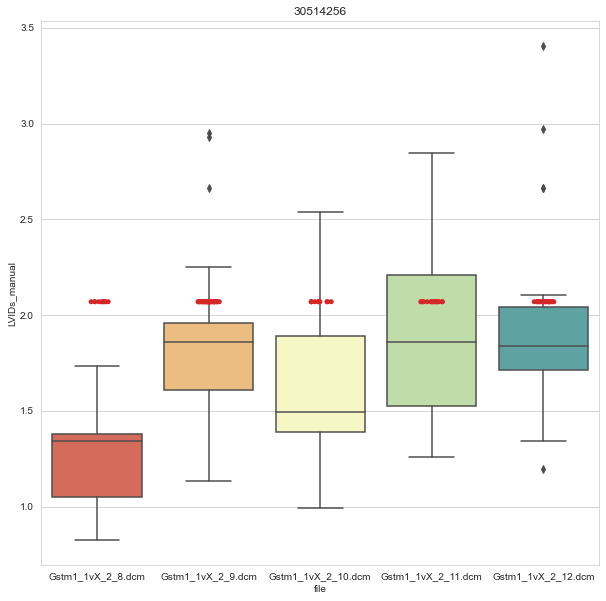

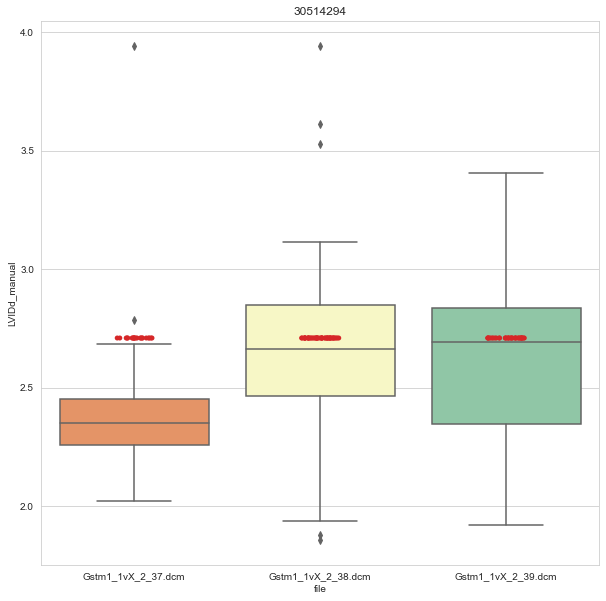

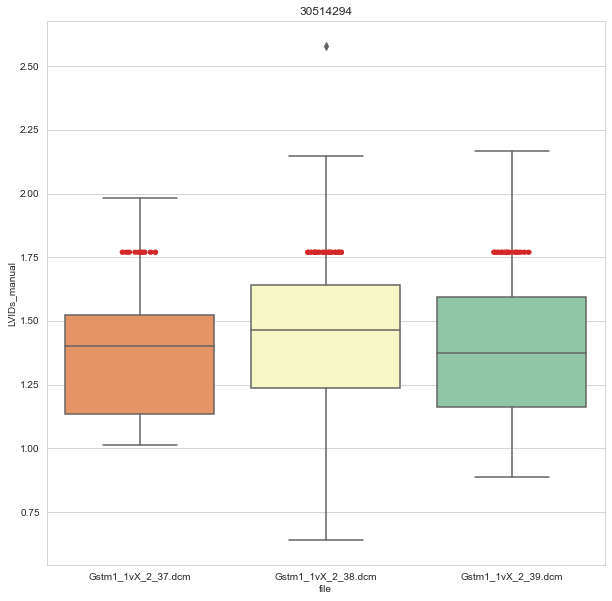

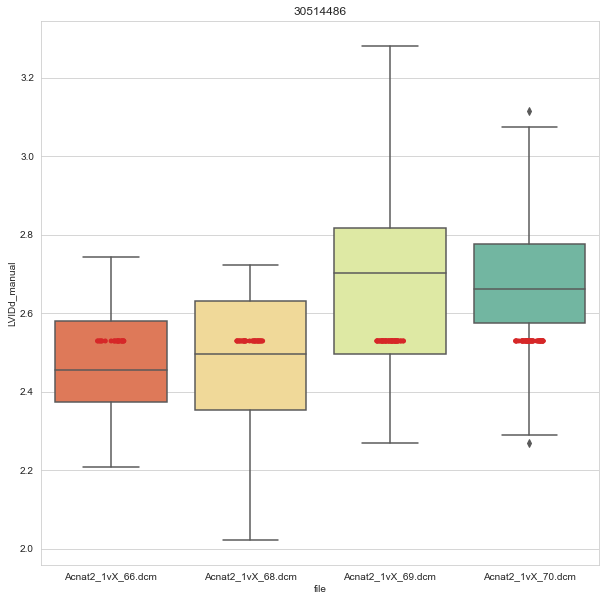

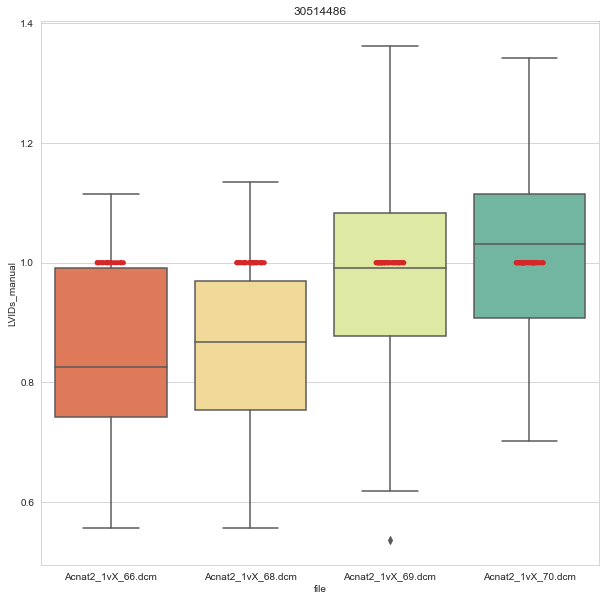

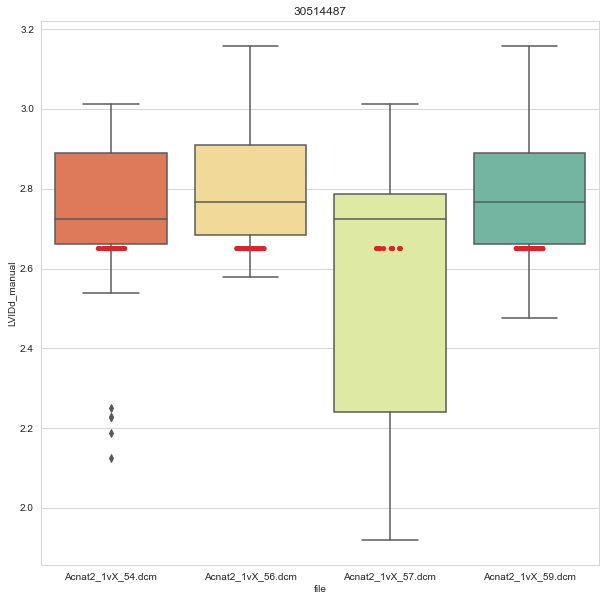

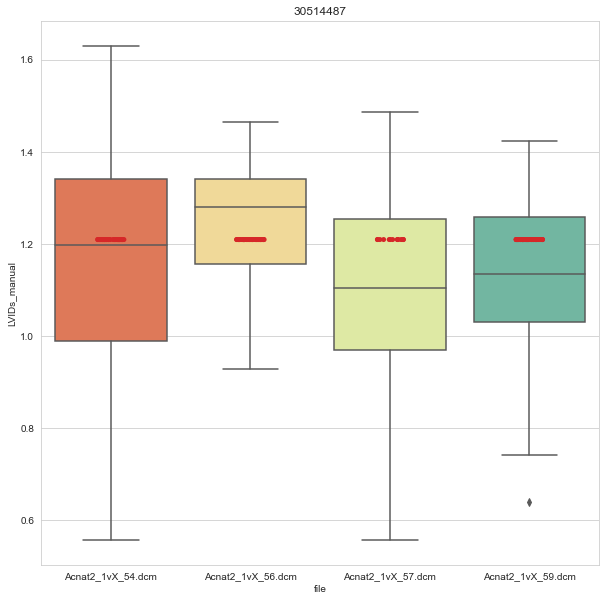

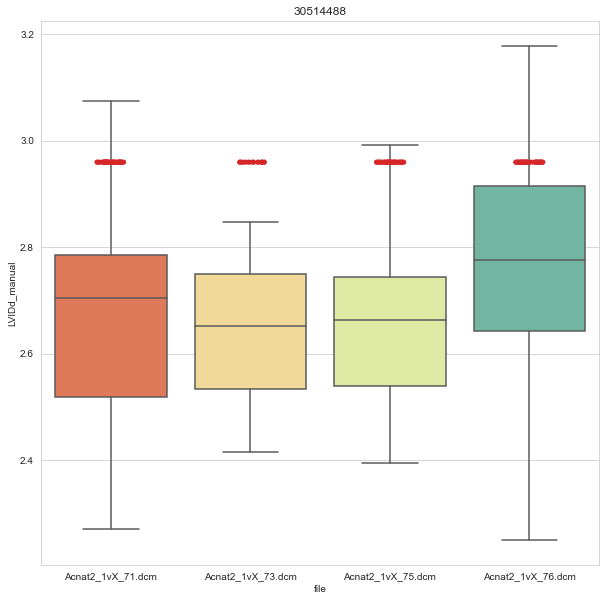

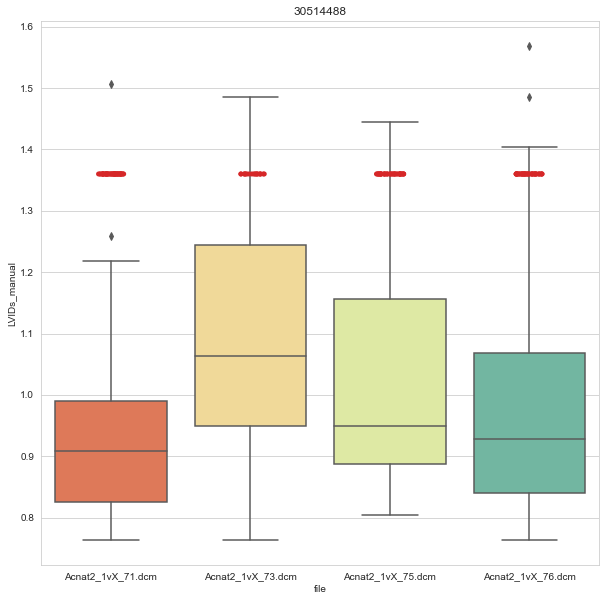

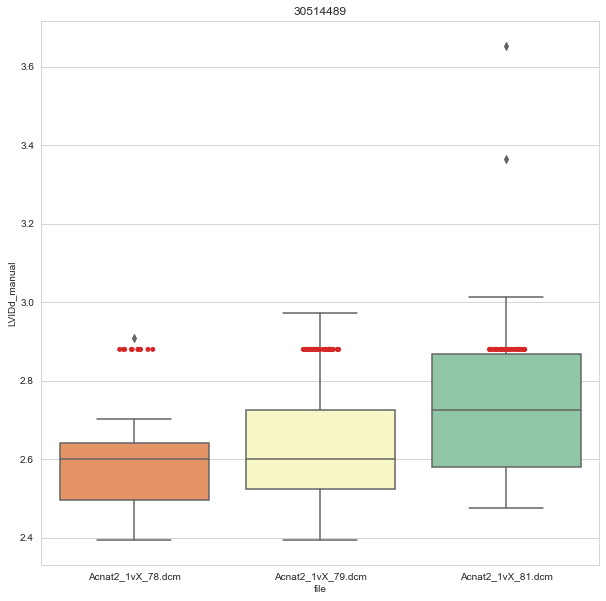

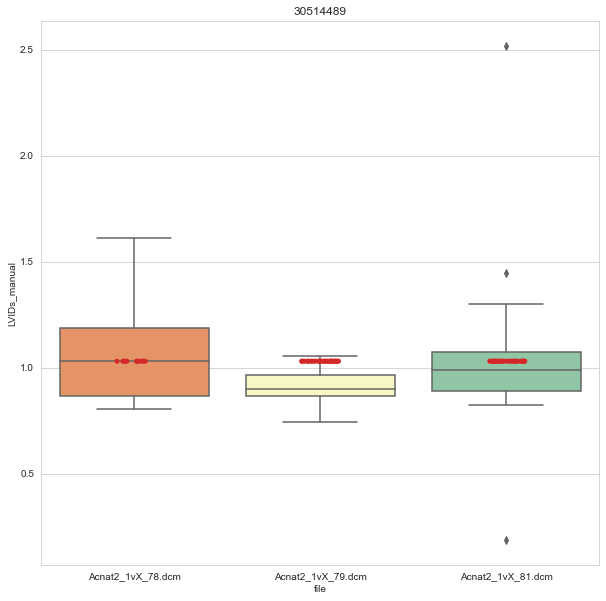

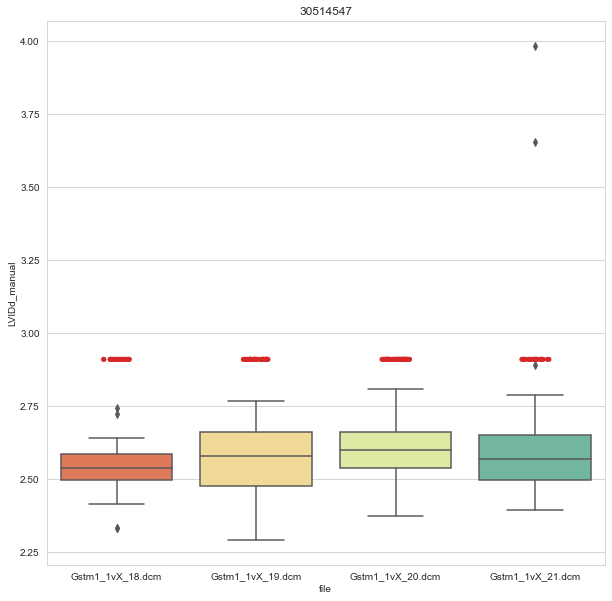

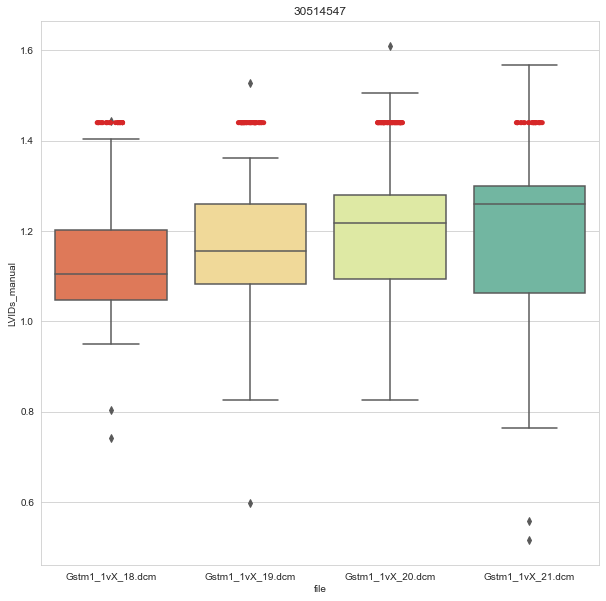

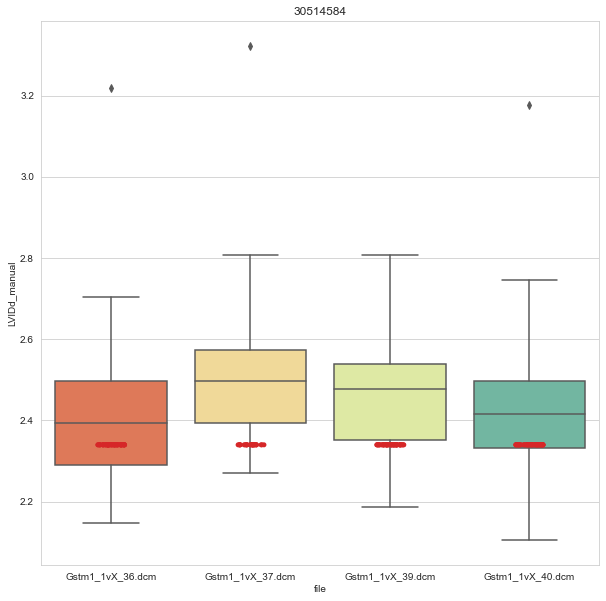

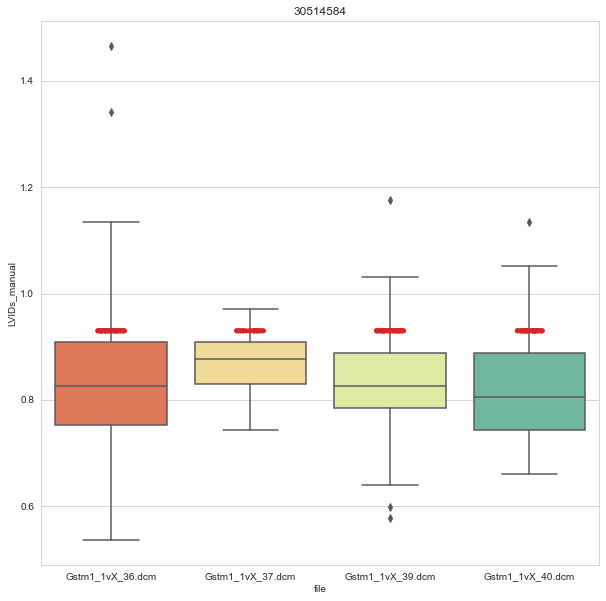

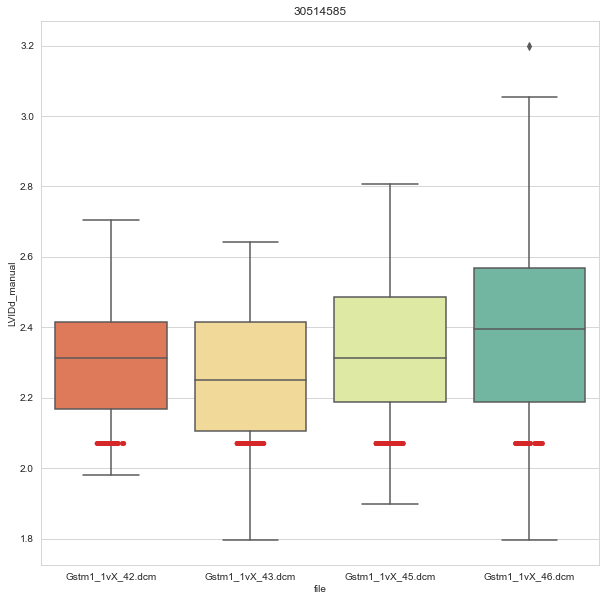

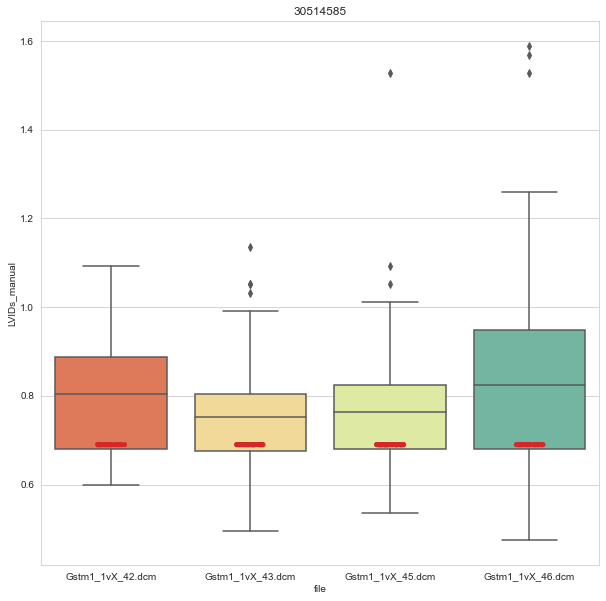

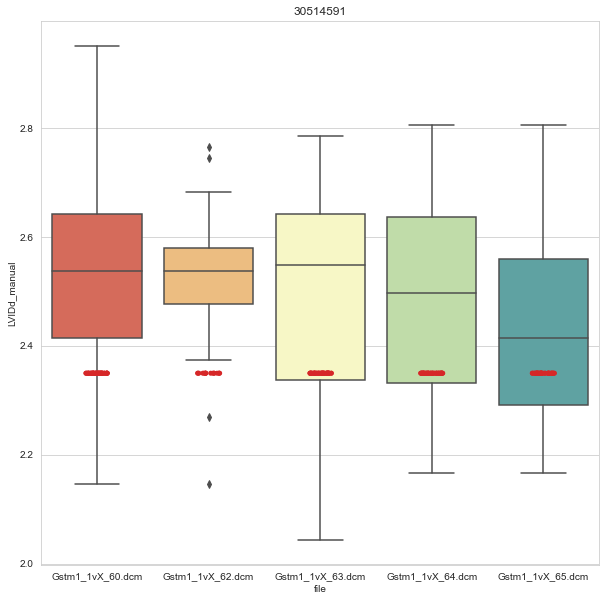

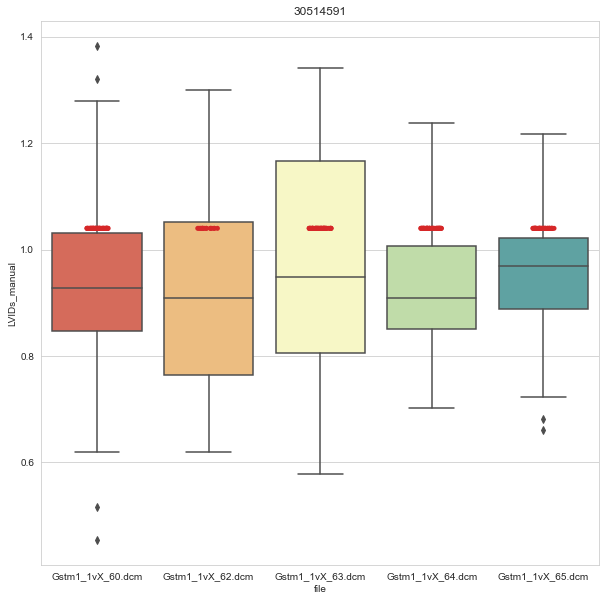

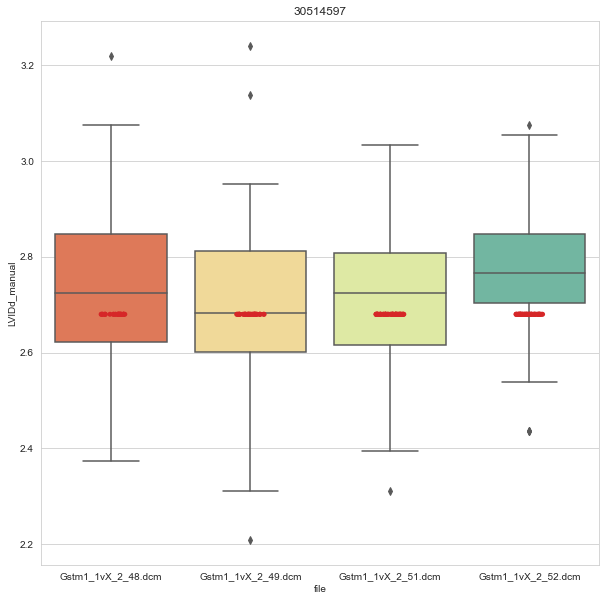

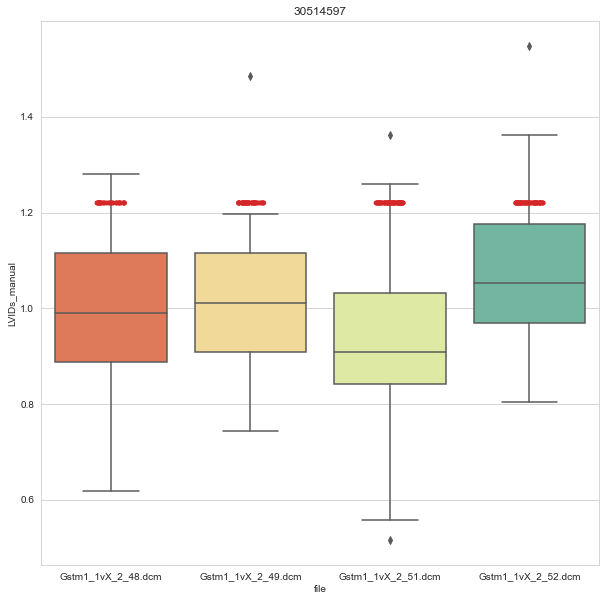

In [9]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [10]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
0,30514213,Acnat2_1vX_111,75.299760,24.700240
1,30514213,Acnat2_1vX_117,45.879733,54.120267
2,30514213,Acnat2_1vX_118,78.828366,21.171634
3,30514213,Acnat2_1vX_116,71.766318,28.233682
4,30514214,Acnat2_1vX_129,17.677287,82.322713
...,...,...,...,...
1403,30514591,Gstm1_1vX_60,96.471394,3.528606
1408,30514597,Gstm1_1vX_2_51,96.470790,3.529210
1409,30514597,Gstm1_1vX_2_49,78.824739,21.175261
1410,30514597,Gstm1_1vX_2_52,92.942789,7.057211


### Image quality per mouse

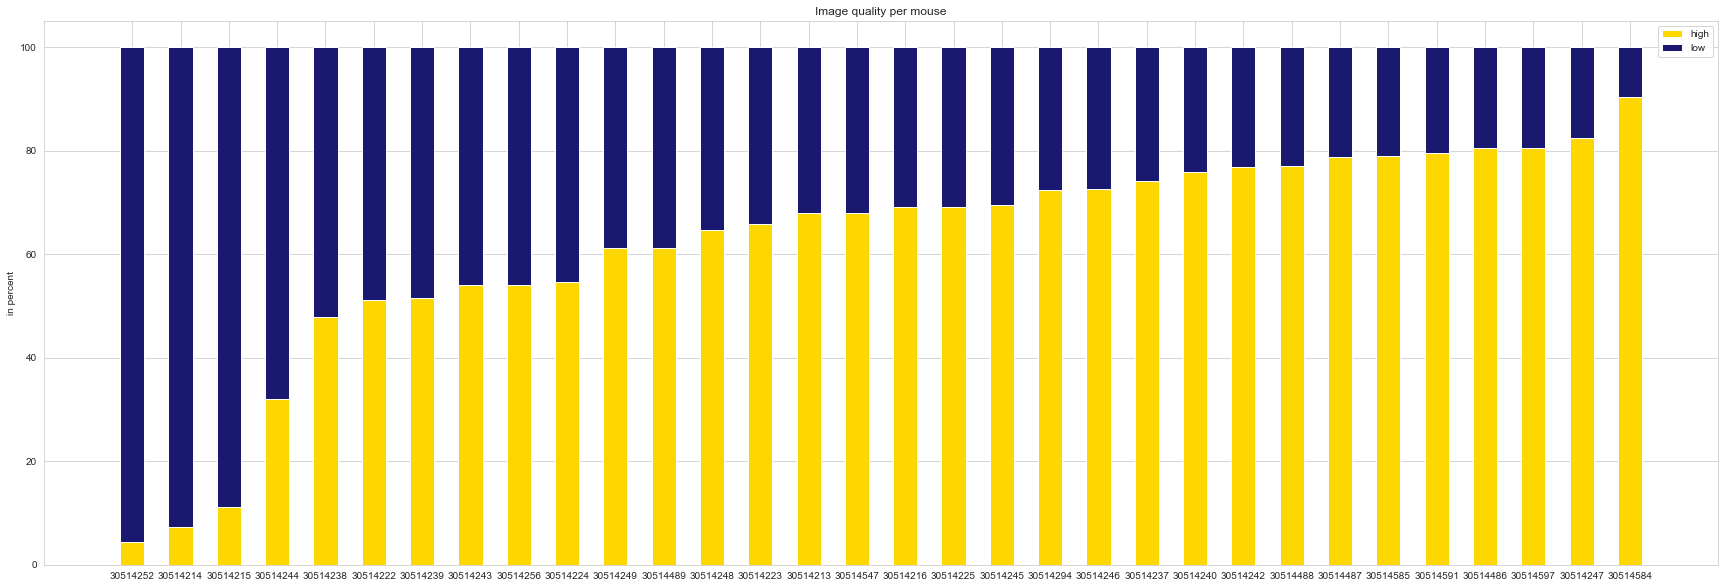

In [11]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(30,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [12]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Acnat2,62.25,37.75


## Calculation of stats

In [13]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [14]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [15]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [16]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [17]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,4110.00,4110.00,4110.00,4110.00
mean,0.05,-0.08,1.37,2.80
std,0.26,0.24,7.41,8.27
min,-1.67,-1.26,-88.32,-66.16
25%,-0.10,-0.20,-0.94,-1.58
50%,0.05,-0.07,1.63,2.78
75%,0.20,0.05,4.34,7.32
max,2.19,1.49,28.93,43.92
number of mice,32.00,32.00,32.00,32.00


## Calculating p-values with manually annotated data

In [18]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [19]:
# LVIDs systole
_, f_man_LVIDs = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDs_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDs = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDs_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDs = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDs_manual'], manual[manual['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)

# LVIDs diastole
_, f_man_LVIDd = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDd_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDd = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDd_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDd = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDd_manual'], manual[manual['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)

# Ejection fraction
_, f_man_ef = mannwhitneyu(f_man[f_man['genotype'] == 'control']['EF_manual'], f_man[f_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, m_man_ef = mannwhitneyu(m_man[m_man['genotype'] == 'control']['EF_manual'], m_man[m_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, man_ef = mannwhitneyu(manual[manual['genotype'] == 'control']['EF_manual'], manual[manual['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)

#Fractional shortening
_, f_man_fs= mannwhitneyu(f_man[f_man['genotype'] == 'control']['FS_manual'], f_man[f_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, m_man_fs= mannwhitneyu(m_man[m_man['genotype'] == 'control']['FS_manual'], m_man[m_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, man_fs= mannwhitneyu(manual[manual['genotype'] == 'control']['FS_manual'], manual[manual['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)

## Calculating p-values with automatically annotated data

### Creation of subgroups

In [20]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

### Wilcoxn-Rank-Sum-Test

In [21]:
# LVIDs systole
_, p_f_auto_LVIDs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDs_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDs_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDs_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)

In [22]:
# LVIDs diastole
_, p_f_auto_LVIDd = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDd_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDd = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDd_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDd = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDd_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)

In [23]:
# Ejection fraction
_, p_f_auto_ef = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['EF_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_ef = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['EF_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_ef = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['EF_auto'], means_auto[means_auto['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)

In [24]:
# Fractional shortening
_, p_f_auto_fs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['FS_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_fs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['FS_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_fs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['FS_auto'], means_auto[means_auto['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)

In [25]:
p_values = pd.DataFrame([[f_man_LVIDs, p_f_auto_LVIDs, m_man_LVIDs, p_m_auto_LVIDs ],
                         [f_man_LVIDd, p_f_auto_LVIDd, m_man_LVIDd, p_m_auto_LVIDd ],
                         [f_man_ef   , p_f_auto_ef   , m_man_ef   , p_m_auto_ef    ],
                         [f_man_fs   , p_f_auto_fs   , m_man_fs   , p_m_auto_fs    ]],
                        index = ['LVIDs', 'LVIDd', 'ejection fraction', 'fractional shortening'],
                        columns = ['f manual', 'f automatic', 'm manual', 'm automatic'])

In [26]:
p_values.round(3)

,f manual,f automatic,m manual,m automatic
LVIDs,0.798,0.382,0.248,0.083
LVIDd,0.574,0.878,0.248,0.105
ejection fraction,0.798,0.195,0.279,0.195
fractional shortening,0.878,0.161,0.279,0.234


In [27]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control']),
      len(f_man[f_man['genotype'] == 'mutant']),
      len(means_auto_f[means_auto_f['genotype'] == 'mutant'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control']),
      len(m_man[m_man['genotype'] == 'mutant']),
      len(means_auto_m[means_auto_m['genotype'] == 'mutant'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con', 'man mut', 'auto mut']
)
num_stats

,man con,auto con,man mut,auto mut
f,8,8,8,8
m,8,8,8,8


In [28]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')
p_values.to_csv(gene + '_p_values.csv')

In [29]:
def color_p_values(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'coral' if val < 0.05 else ''
    return 'background-color: %s' % color

In [30]:
analysis_overview = p_values.style.applymap(color_p_values).format("{:1.3f}")
analysis_overview

,f manual,f automatic,m manual,m automatic
LVIDs,0.798,0.382,0.248,0.083
LVIDd,0.574,0.878,0.248,0.105
ejection fraction,0.798,0.195,0.279,0.195
fractional shortening,0.878,0.161,0.279,0.234
